# Events to DataFrame
ObsPlus provides a way to extract useful summary information from ObsPy objects in order to create dataframes. This transformation is lossy but very useful when the full complexity of the `Catalog` object isn't warranted. By default the `events_to_df` function collects information the authors of ObsPlus have found useful, but it is fully extensible/customizable using the functionality of the [DataFrameExtractor](../utils/dataframeextractor.ipynb).

To demonstrate how the `Catalog` can be flattened into a table, let's again use the Crandall catalog.

In [1]:
import obspy
import numpy as np
from matplotlib import pyplot as plt
from obspy.clients.fdsn import Client

import obsplus

/home/derrick/Gits/obspy/obspy/core/util/base.py:386: UserWarning: 'Proj.proj_version' is deprecated. Please use `pyproj.proj_version_str` instead.
  if hasattr(_proj, 'proj_version'):
/home/derrick/Gits/obspy/obspy/core/util/base.py:387: UserWarning: 'Proj.proj_version' is deprecated. Please use `pyproj.proj_version_str` instead.
  version_string = str(getattr(_proj, 'proj_version'))


In [2]:
crandall = obsplus.load_dataset('crandall_test')
cat = crandall.event_client.get_events()
ev_df = obsplus.events_to_df(cat)

ev_df.head()

,time,latitude,longitude,depth,magnitude,event_description,associated_phase_count,azimuthal_gap,event_id,horizontal_uncertainty,...,standard_error,used_phase_count,station_count,vertical_uncertainty,updated,author,agency_id,creation_time,version,stations
0,2007-08-06 08:48:40.010,39.4635,-111.2277,410.0,4.37,LR,0.0,NaN,smi:local/248839,NaN,...,1.7356,0.0,134.0,NaN,2018-10-10 20:33:13.618110976,DC,NIOSH,2018-10-10 20:33:13.618111,,"DUG, GMR, H13A, HLID, I11A, I13A, J11A, J12A, ..."
1,2007-08-07 02:14:24.080,39.4632,-111.2230,4180.0,1.26,LR,0.0,NaN,smi:local/248883,NaN,...,0.8834,0.0,14.0,NaN,2018-10-10 21:10:26.864045056,DC,NIOSH,2018-10-10 21:10:26.864045,,"DUG, P14A, P15A, P16A, P18A, Q14A, Q16A, Q18A,..."
2,2007-08-07 03:44:18.470,39.4625,-111.2152,4160.0,1.45,LR,0.0,NaN,smi:local/248887,NaN,...,0.5716,0.0,15.0,NaN,2018-10-10 21:10:27.576204032,DC,NIOSH,2018-10-10 21:10:27.576204,,"DUG, N17A, P14A, P16A, P18A, Q14A, Q16A, Q18A,..."
3,2007-08-07 07:13:05.760,39.4605,-111.2242,3240.0,2.24,,0.0,NaN,smi:local/248891,NaN,...,0.9901,0.0,35.0,NaN,2012-04-12 10:19:26.228029952,,,NaT,,"DUG, L15A, M14A, M15A, M16A, N14A, N15A, N16A,..."
4,2007-08-07 02:05:04.490,39.4648,-111.2255,1790.0,2.08,LR,0.0,NaN,smi:local/248882,NaN,...,0.9935,0.0,35.0,NaN,2018-10-10 21:15:19.190404096,DC,NIOSH,2018-10-10 21:15:19.190404,,"DUG, L15A, M14A, M15A, N14A, N15A, N16A, N17A,..."


`events_to_df` can also operate on other `event_client`s, like the `EventBank`.

In [3]:
bank = crandall.event_client
ev_df2 = obsplus.events_to_df(bank)
ev_df2.head()

,time,latitude,longitude,depth,magnitude,event_description,associated_phase_count,azimuthal_gap,event_id,horizontal_uncertainty,...,standard_error,used_phase_count,station_count,vertical_uncertainty,updated,author,agency_id,creation_time,version,stations
0,2007-08-06 08:48:40.010,39.4635,-111.2277,410.0,4.37,LR,0.0,NaN,smi:local/248839,NaN,...,1.7356,0.0,134.0,NaN,2018-10-10 20:33:13.618110976,DC,NIOSH,2018-10-10 20:33:13.618111,,"DUG, GMR, H13A, HLID, I11A, I13A, J11A, J12A, ..."
1,2007-08-07 02:14:24.080,39.4632,-111.2230,4180.0,1.26,LR,0.0,NaN,smi:local/248883,NaN,...,0.8834,0.0,14.0,NaN,2018-10-10 21:10:26.864045056,DC,NIOSH,2018-10-10 21:10:26.864045,,"DUG, P14A, P15A, P16A, P18A, Q14A, Q16A, Q18A,..."
2,2007-08-07 03:44:18.470,39.4625,-111.2152,4160.0,1.45,LR,0.0,NaN,smi:local/248887,NaN,...,0.5716,0.0,15.0,NaN,2018-10-10 21:10:27.576204032,DC,NIOSH,2018-10-10 21:10:27.576204,,"DUG, N17A, P14A, P16A, P18A, Q14A, Q16A, Q18A,..."
3,2007-08-07 07:13:05.760,39.4605,-111.2242,3240.0,2.24,,0.0,NaN,smi:local/248891,NaN,...,0.9901,0.0,35.0,NaN,2012-04-12 10:19:26.228029952,,,NaT,,"DUG, L15A, M14A, M15A, M16A, N14A, N15A, N16A,..."
4,2007-08-07 02:05:04.490,39.4648,-111.2255,1790.0,2.08,LR,0.0,NaN,smi:local/248882,NaN,...,0.9935,0.0,35.0,NaN,2018-10-10 21:15:19.190404096,DC,NIOSH,2018-10-10 21:15:19.190404,,"DUG, L15A, M14A, M15A, N14A, N15A, N16A, N17A,..."


Now we have access to all the wonderful Pandas magics. Here are a few contrived examples of things we may want to do:

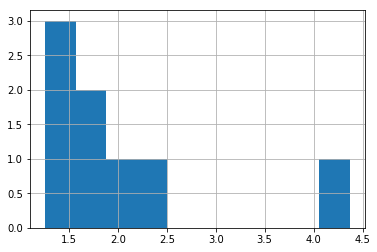

In [4]:
# plot a histogram of magnitudes
ev_df.magnitude.hist()
plt.show()

Since there aren't a lot of events let's look at the picks to make things slightly more interesting:

In [5]:
# get pick info into a dataframe
picks = obsplus.picks_to_df(cat)

In [6]:
# count the types of phase picks made on all events
picks.phase_hint.value_counts()

P     384
S      85
Pb     72
Sb     40
?      33
Name: phase_hint, dtype: int64

In [7]:
# calculate the max pick_time for each event
picks.groupby('event_id')['time'].max()

event_id
smi:local/248828   2007-08-06 01:46:30.424280
smi:local/248839   2007-08-06 08:50:18.697470
smi:local/248843   2007-08-06 10:49:02.491970
smi:local/248882   2007-08-07 02:06:40.963320
smi:local/248883   2007-08-07 02:15:24.573490
smi:local/248887   2007-08-07 03:45:22.084660
smi:local/248891   2007-08-07 07:14:24.078630
smi:local/248925   2007-08-07 21:43:54.936950
Name: time, dtype: datetime64[ns]

We could also calculate travel time stats grouped by stations on stations with at least 3 P picks.
Since all the events are coming from roughly the same location (within a few km) we might look for stations that have high standard deviations or obvious outliers as on the the first steps in quality control.

In [8]:
# get only P picks
df = picks[picks.phase_hint.str.upper() == 'P']

# add columns for travel time
df['travel_time'] = df['time'] - df['event_time']

# filter out stations that aren't used at least 3 times
station_count = df['station'].value_counts()
stations_with_three = station_count[station_count > 2]

# only include picks that are used on at least 3 stations
df = df[df.station.isin(stations_with_three.index)]

# get stats of travel times
df.groupby('station')['travel_time'].describe()

,count,mean,std,min,25%,50%,75%,max
station,,,,,,,,
DUG,6,0 days 00:00:26.450391,0 days 00:00:00.271624,0 days 00:00:26.071740,0 days 00:00:26.329110,0 days 00:00:26.405940,0 days 00:00:26.613517,0 days 00:00:26.832520
L15A,4,0 days 00:00:44.281470,0 days 00:00:00.395213,0 days 00:00:43.904210,0 days 00:00:43.958120,0 days 00:00:44.299440,0 days 00:00:44.622790,0 days 00:00:44.622790
M14A,3,0 days 00:00:42.733800,0 days 00:00:00.232198,0 days 00:00:42.465680,0 days 00:00:42.666770,0 days 00:00:42.867860,0 days 00:00:42.867860,0 days 00:00:42.867860
M15A,6,0 days 00:00:37.389573,0 days 00:00:00.395734,0 days 00:00:36.924550,0 days 00:00:37.155292,0 days 00:00:37.276860,0 days 00:00:37.723365,0 days 00:00:37.872200
N14A,4,0 days 00:00:34.753022,0 days 00:00:00.309191,0 days 00:00:34.382170,0 days 00:00:34.556087,0 days 00:00:34.810995,0 days 00:00:35.007930,0 days 00:00:35.007930
N15A,4,0 days 00:00:30.787567,0 days 00:00:00.678323,0 days 00:00:30.187990,0 days 00:00:30.206282,0 days 00:00:30.793665,0 days 00:00:31.374950,0 days 00:00:31.374950
N16A,3,0 days 00:00:27.035340,0 days 00:00:00.319788,0 days 00:00:26.666080,0 days 00:00:26.943025,0 days 00:00:27.219970,0 days 00:00:27.219970,0 days 00:00:27.219970
N17A,3,0 days 00:00:28.347476,0 days 00:00:00.111948,0 days 00:00:28.218210,0 days 00:00:28.315160,0 days 00:00:28.412110,0 days 00:00:28.412110,0 days 00:00:28.412110
N18A,3,0 days 00:00:34.095483,0 days 00:00:00.503778,0 days 00:00:33.513770,0 days 00:00:33.950055,0 days 00:00:34.386340,0 days 00:00:34.386340,0 days 00:00:34.386340


In addition to `events_to_df` and `picks_to_df`, the following extractors are defined:

- `arrivals_to_df` extracts arrival information from an Origin object (or from the preferred origin of each event in a catalog)
- `amplitudes_to_df` extracts amplitude information
- `station_magnitudes_to_df` extracts station magnitude information from a catalog, event, or magnitude
- `magnitudes_to_df` extracts magnitude information